In [1]:
from sklearn.datasets import make_moons

# 75 대 25
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [3]:
from sklearn.tree import DecisionTreeClassifier

# max_depth, criterion을 지정하지 않으면 과적합이 심하게 일어남
# max_depth : 가지치기 단계. max_depth=3일 경우 가지치기 3번만
model = DecisionTreeClassifier(random_state=2, max_depth=3, criterion='entropy')
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=2)

In [4]:
print("학습용: ", model.score(X_train, y_train))
print("검증용: ", model.score(X_test, y_test))

학습용:  0.9066666666666666
검증용:  0.92


In [5]:
# 엔트로피 : 불확실성을 측정하는 기준
# 지니 계수 : 

[Text(136.96363636363637, 190.26, 'X[1] <= 0.06\nentropy = 1.0\nsamples = 75\nvalue = [37, 38]'),
 Text(60.872727272727275, 135.9, 'X[0] <= -0.617\nentropy = 0.242\nsamples = 25\nvalue = [1, 24]'),
 Text(30.436363636363637, 81.53999999999999, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(91.30909090909091, 81.53999999999999, 'entropy = 0.0\nsamples = 24\nvalue = [0, 24]'),
 Text(213.05454545454546, 135.9, 'X[0] <= 1.166\nentropy = 0.855\nsamples = 50\nvalue = [36, 14]'),
 Text(152.1818181818182, 81.53999999999999, 'X[0] <= -0.15\nentropy = 0.601\nsamples = 41\nvalue = [35, 6]'),
 Text(121.74545454545455, 27.180000000000007, 'entropy = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(182.61818181818182, 27.180000000000007, 'entropy = 0.795\nsamples = 25\nvalue = [19, 6]'),
 Text(273.92727272727274, 81.53999999999999, 'X[0] <= 1.672\nentropy = 0.503\nsamples = 9\nvalue = [1, 8]'),
 Text(243.4909090909091, 27.180000000000007, 'entropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(304.36

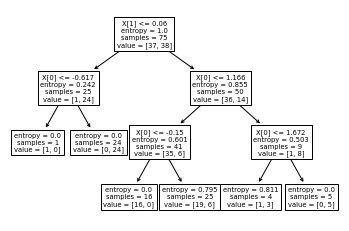

In [5]:
from sklearn import tree
tree.plot_tree(model)

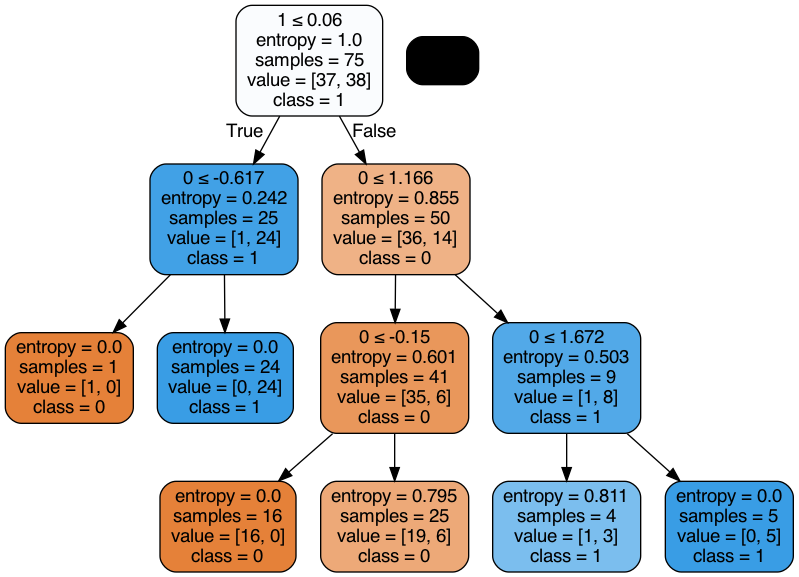

In [6]:
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from IPython.display import Image
import os

dot_data = export_graphviz(model, out_file=None, feature_names=[0,1], class_names=['0','1'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

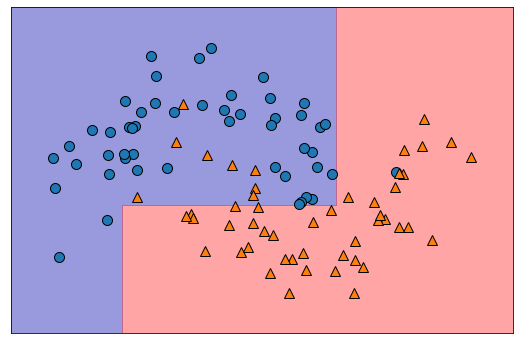

In [7]:
import matplotlib.pyplot as plt
import mglearn

plt.figure(figsize=(9,6))
mglearn.plots.plot_2d_separator(model, X, fill=True, alpha=0.4)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [9]:
from math import log2, ceil

# 동전 앞면 뒷면의 50% 확률은 1비트로 표현
p = 0.5
h = -log2(p)
print('확률: ', p)
print('정보량: ', h, ceil(h))

확률:  0.5
정보량:  1.0 1


In [10]:
# 10% 확률은 4비트가 필요
p = 0.1
h = -log2(p)
print('확률: ', p)
print('정보량: ', h, ceil(h))

확률:  0.1
정보량:  3.321928094887362 4


In [11]:
# 주사위 던지기와 같이 6분의 1의 확률은 3비트가 필요
p = 1/6
h = -log2(p)
print('확률: ', p)
print('정보량: ', h, ceil(h))

확률:  0.16666666666666666
정보량:  2.584962500721156 3


Text(0, 0.5, 'information')

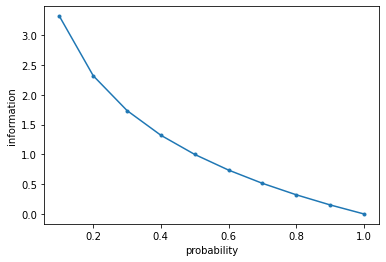

In [12]:
import numpy as np
from matplotlib import pyplot as plt

# 0.1, 1.1, 0.1의 확률
probs = np.arange(0.1, 1.1, 0.1)

# 정보량 계산
info = [-log2(p) for p in probs]

# 확률이 높을수록 정보량은 감소
plt.plot(probs, info, marker='.')
plt.xlabel('probability')
plt.ylabel('information')

In [13]:
# 주사위 던지기의 엔트로피 계산

n = 6
p = 1.0/n

entropy = -sum([p*log2(p) for _ in range(n)])

print(entropy)

2.584962500721156


In [14]:
print(log2(2))
print(log2(4))

1.0
2.0


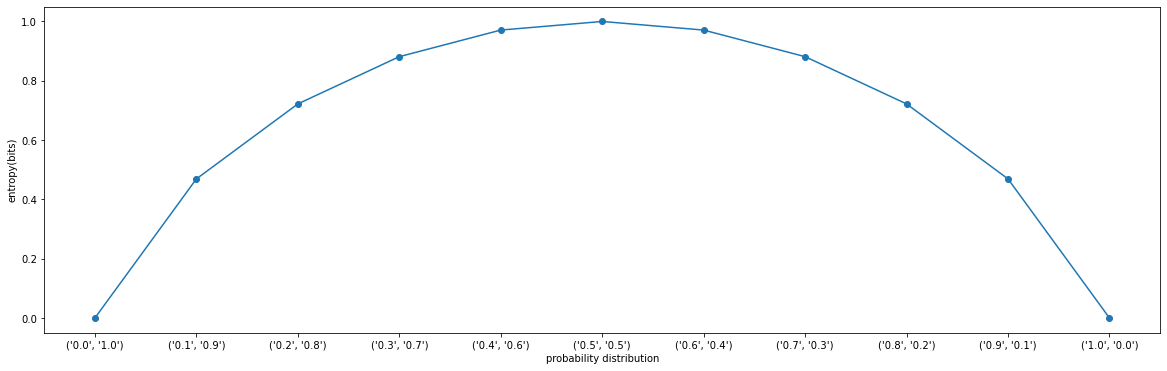

In [15]:
def entropy(events):
    return -sum([p*log2(p+1e-15) for p in events])

probs = np.arange(0.0, 1.1, 0.1)
dists = [[p, 1-p] for p in probs]
ents = [entropy(d) for d in dists]

plt.figure(figsize=(20,6))
plt.plot(probs, ents, marker='o')
xnum=[]
for d in dists:
    dd = (f'{d[0]:.1f}',f'{d[1]:.1f}')
    xnum.append(dd)
plt.xticks(probs, xnum)
plt.xlabel('probability distribution') # 확률 분포
plt.ylabel('entropy(bits)') # 엔트로피
plt.show()

# 엔트로피는 0에서 1사이의 값
# 순도 100%일 때 엔트로피는 0, 50:50일 경우 1.0
# 지니 계수는 순도 100%일 때 0, 50:50일 경우 0.5

In [16]:
# 지니 계수는 로그를 계산할 필요가 없어서 엔트로피보다 구현 성능이 좀 더 우수함

a = np.array([1,3,6])
b = np.array([2,4,6])

# a의 각 원소에서 b의 각 원소를 뺀 행렬
diff = np.subtract.outer(a,b)
print(diff)

[[-1 -3 -5]
 [ 1 -1 -3]
 [ 4  2  0]]


In [17]:
def gini(x):
    mad = np.abs(np.subtract.outer(x,x)).mean()
    rmad = mad/np.mean(x)
    g = 0.5*rmad
    return g

v = [0,1,0,1]
print(gini(v))

s = [1,1,1,1]
print(gini(s))

w = [1,0,1,1]
print(gini(w))

0.5
0.0
0.25


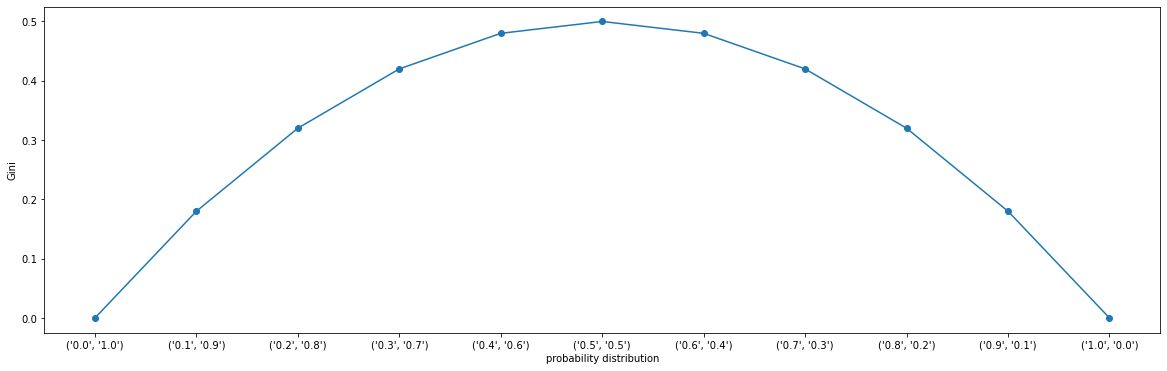

In [18]:
def gini2(events):
    return sum([p*(1-p) for p in events])

probs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
dists = [[p, 1-p] for p in probs]
ents = [gini2(d) for d in dists]
plt.figure(figsize = (20,6))
plt.plot(probs, ents, marker='o')
xnum = []
for d in dists:
    dd = (str(d[0]), '{:.1f}'.format(d[1]))
    xnum.append(dd)
plt.xticks(probs, xnum)
plt.xlabel('probability distribution') # 확률 분포
plt.ylabel('Gini')
plt.show()

In [19]:
# 트리 모형의 splitter

In [20]:
import pandas as pd
df = pd.read_csv("c:/data/rides/rides2.csv")
df["overall"].value_counts()

1    255
0    245
Name: overall, dtype: int64

In [21]:
df.head()

,weekend,num.child,distance,rides,games,wait,clean,overall
0,1,0,114.648259,87,73,60,89,0
1,1,2,27.014097,87,78,76,87,1
2,0,1,63.300975,85,80,70,88,1
3,1,0,25.909931,88,72,66,89,0
4,0,4,54.718307,84,87,74,87,1


In [22]:
train_cols = df.columns[:-1]
X = df[train_cols]
y = df["overall"]

In [23]:
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X,y)
X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=["overall"])
df2 = pd.concat([X_samp,y_samp],axis=1)

df2["overall"].value_counts()

0    245
1    245
Name: overall, dtype: int64

In [24]:
X = X_samp[train_cols]
y = y_samp["overall"]

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

In [26]:
# 트리 모형 생성

from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier(splitter='best', max_depth=3, random_state=0)
model1.fit(X_train, y_train)

pred = model1.predict(X_test)
print("학습용: ", model1.score(X_train, y_train))
print("검증용: ", model1.score(X_test, y_test))

학습용:  0.8494897959183674
검증용:  0.7857142857142857


In [27]:
model2 = DecisionTreeClassifier(splitter='random', max_depth=3, random_state=0)
model2.fit(X_train, y_train)

pred = model2.predict(X_test)
print("학습용: ", model2.score(X_train, y_train))
print("검증용: ", model2.score(X_test, y_test))

학습용:  0.7270408163265306
검증용:  0.7244897959183674


In [28]:
# 트리 모형의 ccp_alpha

In [29]:
df = pd.read_csv("c:/data/customer/customer.csv")
df.columns

Index(['Int'l Plan', 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls',
       'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins',
       'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn'],
      dtype='object')

In [30]:
df.head()

,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [31]:
train_cols = ["Int'l Plan", "VMail Plan", "VMail Message", "Day Mins", 
"Day Calls", "Day Charge", "Eve Mins", "Eve Calls", "Eve Charge", "Night Mins", "Night Calls", "Night Charge",
"Intl Mins", "Intl Calls", "Intl Charge", "CustServ Calls"]
X = df[train_cols]
y = df["Churn"]

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [33]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)
print(impurities)

[0.         0.00019908 0.00026042 0.00026445 0.00026491 0.00026538
 0.00031594 0.00037412 0.00038015 0.00038015 0.00038015 0.00038015
 0.00038197 0.00038197 0.00038768 0.00039094 0.00039295 0.00039309
 0.00039444 0.00039693 0.00039873 0.00039913 0.00040016 0.00040016
 0.00047358 0.00050914 0.00051515 0.00051849 0.00052346 0.00053355
 0.00053355 0.00053355 0.00060024 0.00060977 0.00060977 0.00066693
 0.00066693 0.00067847 0.0007114  0.00072029 0.00073343 0.0007503
 0.00075493 0.00076281 0.00076666 0.00076954 0.00077809 0.00078116
 0.0008161  0.00090036 0.00096038 0.00097442 0.00103476 0.00105485
 0.00131228 0.00169012 0.00186842 0.00205094 0.00216086 0.00219508
 0.00250862 0.00304989 0.00310298 0.00373953 0.00418187 0.00745216
 0.0078461  0.00952263 0.01230072 0.01620748 0.02223509 0.02556861]
[0.         0.00079632 0.00157758 0.00237094 0.00316567 0.0039618
 0.00554151 0.00628975 0.00705005 0.00857066 0.00933097 0.01009127
 0.01085521 0.01161915 0.01239452 0.01317639 0.01474819 0.01632

Text(0, 0.5, 'impurities')

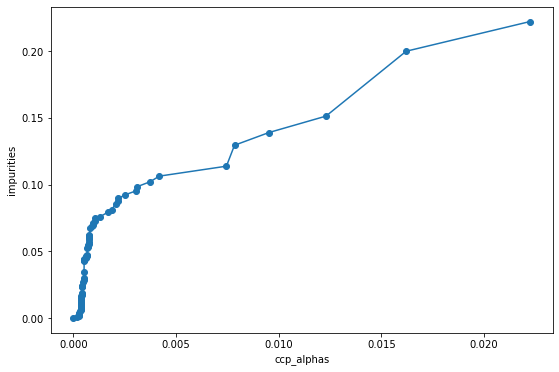

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))
plt.plot(ccp_alphas[:-1], impurities[:-1], marker='o')
plt.xlabel("ccp_alphas")
plt.ylabel("impurities")

In [35]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

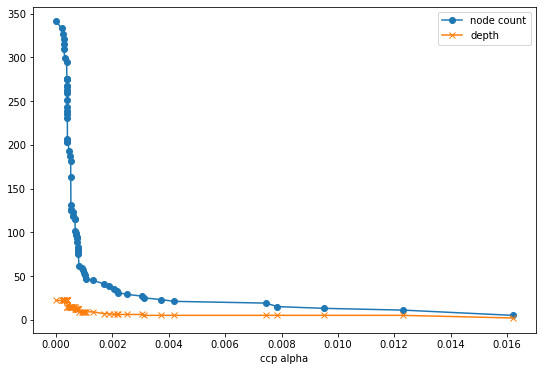

In [38]:
clfs = clfs[:-1] # 마지막 필드는 과적합 때문에 제외
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

plt.figure(figsize=(9,6))
plt.plot(ccp_alphas, node_counts, marker='o', label='node count')
plt.plot(ccp_alphas, depth, marker='x', label='depth')
plt.xlabel('ccp alpha')
plt.legend()
plt.show()

최고 정확도 :  0.9616306954436451
최적 alpha :  0.0008161045299304866


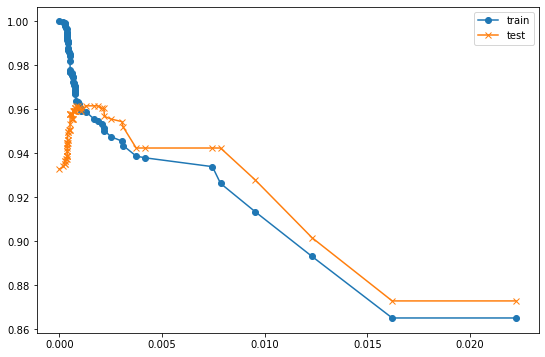

In [37]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

m = max(test_scores)
i = np.argmax(test_scores)
print("최고 정확도 : ",m)
print("최적 alpha : ", ccp_alphas[i])

plt.figure(figsize=(9,6))
plt.plot(ccp_alphas, train_scores, marker='o', label='train')
plt.plot(ccp_alphas, test_scores, marker='x', label='test')
plt.legend()
plt.show()

In [ ]:
# 트리 모형의 max_leaf_nodes

In [39]:
import pandas as pd
df = pd.read_csv("c:/data/pima/data.csv")
df.columns

Index(['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin',
       'bmi', 'Diabetes_Pedigree_Function', 'age', 'outcome'],
      dtype='object')

In [40]:
X = df[['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin',
       'bmi', 'Diabetes_Pedigree_Function', 'age']]
y = df['outcome']

# 샘플링 안함~
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [41]:
model = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)

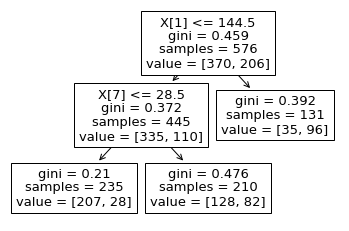

In [42]:
%matplotlib inline
tree.plot_tree(model)
plt.show()

In [43]:
from sklearn.tree import export_text
tree_rules = export_text(model, feature_names=list(X_train.columns))
print(tree_rules)

|--- glucose <= 144.50
|   |--- age <= 28.50
|   |   |--- class: 0
|   |--- age >  28.50
|   |   |--- class: 0
|--- glucose >  144.50
|   |--- class: 1



In [46]:
n_nodes = model.tree_.node_count
print("노드 개수 :",n_nodes)
threshold = model.tree_.threshold
print("노드의 임계값 :",threshold)

노드 개수 : 5
노드의 임계값 : [144.5  28.5  -2.   -2.   -2. ]


In [ ]:
# 민감도와 특이도

In [47]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

X, y = make_classification(n_samples=16, n_features=2, n_informative=2, n_redundant=0, random_state=10)

model = LogisticRegression().fit(X,y)
y_hat = model.predict(X)
f_value = model.decision_function(X) # 판별함수

In [54]:
print(y_hat)
print(f_value)

[1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0]
[ 1.46512894 -1.03203074 -0.7355014   0.90163222  0.90811712 -1.10892301
  1.28523411 -2.9451636   1.29344604  2.10010735  2.4718164  -2.1000621
  0.16408684 -1.18284583 -0.64727888 -0.9956665 ]


In [48]:
df = pd.DataFrame(np.vstack([f_value, y_hat, y]).T, columns=["f", "y_hat", "y"])
df.sort_values("f", ascending=False).reset_index(drop=True)

,f,y_hat,y
0,2.471816,1.0,1.0
1,2.100107,1.0,1.0
2,1.465129,1.0,1.0
3,1.293446,1.0,1.0
4,1.285234,1.0,0.0
5,0.908117,1.0,1.0
6,0.901632,1.0,1.0
7,0.164087,1.0,1.0
8,-0.647279,0.0,0.0
9,-0.735501,0.0,0.0


In [49]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, y_hat, labels=[0,1])

array([[7, 1],
       [1, 7]], dtype=int64)

In [50]:
tpr0 = 7 / (7 + 1)
fpr0 = 1 / (1 + 7)
print(tpr0) # 정확도(민감도)
print(fpr0) # 특이도

0.875
0.125


In [51]:
from sklearn.metrics import roc_curve

# 판별 함수의 출력값에 따라 판별 기준을 바꾸어 계산한 fpr, tpr
fpr, tpr, thresholds = roc_curve(y, model.decision_function(X))
fpr, tpr, thresholds

(array([0.   , 0.   , 0.   , 0.125, 0.125, 0.5  , 0.5  , 1.   ]),
 array([0.   , 0.125, 0.5  , 0.5  , 0.875, 0.875, 1.   , 1.   ]),
 array([ 3.4718164 ,  2.4718164 ,  1.29344604,  1.28523411,  0.16408684,
        -0.9956665 , -1.03203074, -2.9451636 ]))

In [52]:
fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:, 1])
fpr, tpr, thresholds

(array([0.   , 0.   , 0.   , 0.125, 0.125, 0.5  , 0.5  , 1.   ]),
 array([0.   , 0.125, 0.5  , 0.5  , 0.875, 0.875, 1.   , 1.   ]),
 array([1.92214228, 0.92214228, 0.7847299 , 0.78333942, 0.54092992,
        0.26979429, 0.26269059, 0.04996559]))

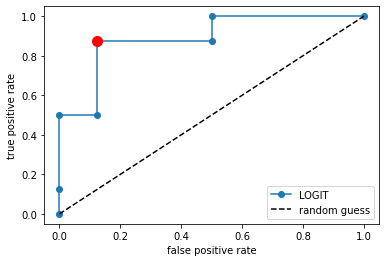

In [55]:
%matplotlib inline

plt.plot(fpr, tpr, 'o-', label='LOGIT')
plt.plot([0,1], [0,1], 'k--', label='random guess')
plt.plot([fpr0], [tpr0], 'ro', ms=10) # 최적
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()
plt.show()

In [ ]:
# ROC와 AUC

In [56]:
df = pd.read_csv("c:/data/concrete/concrete.csv")
df.columns

Index(['cement', 'flag', 'ash', 'water', 'superplastic', 'coarseagg',
       'findagg', 'age', 'strength', 'class'],
      dtype='object')

In [58]:
train_cols = ['cement', 'flag', 'ash', 'water', 'superplastic', 'coarseagg', 'findagg', 'age']
X = df[train_cols]
y = df['class']

from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X,y)
X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=['class'])
df2 = pd.concat([X_samp, y_samp], axis=1)

df2["class"].value_counts()

0    507
1    507
Name: class, dtype: int64

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

model1 = LogisticRegression(random_state=0, max_iter=1000)
model1.fit(X_train, y_train)

print(model1.score(X_train, y_train))
print(model1.score(X_test, y_test))

0.8543689320388349
0.8106796116504854


In [60]:
model1.decision_function(X_test) # 판별함수는 0을 기준으로 +면 1, -면 0

array([-3.91525645e+00, -8.18207470e-01, -4.10472790e+00, -2.29068422e-01,
        1.21657118e+00,  3.30876960e+00,  2.17730048e+00,  1.15047952e+00,
        1.09784413e+00, -4.61640512e+00, -1.08198461e+00,  3.03614806e-02,
       -1.23877328e+00,  3.04335365e+00, -7.01413034e-01,  3.55350642e+00,
       -3.00048863e-01,  2.38454913e+00, -2.18481192e+00, -2.79195506e+00,
        1.42787292e+00, -6.50340130e-01,  5.56169300e-01, -2.44768611e+00,
        5.27719956e-01, -2.96858297e+00, -1.01021864e+00, -2.51032501e+00,
        1.74922550e+00,  4.04975690e-02,  7.75637682e+00,  4.54147370e+00,
        1.10067046e+01,  3.45697113e+00, -5.55422651e-01,  1.07670088e+01,
       -4.05187892e+00, -2.16558138e-01, -7.21581668e-01,  1.35175082e+01,
       -4.58294719e-01,  4.58674116e+00,  1.92450968e+00, -3.09480681e+00,
       -2.52356190e+00, -3.04669700e+00, -3.25300542e-02, -3.07445578e-01,
        1.26513072e+00, -3.14676298e+00, -1.01688762e+00, -1.03936770e+00,
       -7.04426812e-01,  

In [61]:
from sklearn.svm import SVC

model2 = SVC(random_state=0)
model2.fit(X_train, y_train)

print(model2.score(X_train, y_train))
print(model2.score(X_test, y_test))

0.7912621359223301
0.7669902912621359


In [62]:
model2.decision_function(X_test)

array([-1.41175307e+00, -7.25934767e-01, -1.26178529e+00, -6.15779784e-01,
        4.94928235e-01,  1.19982636e+00,  4.32487668e-01, -1.83807433e-01,
       -8.22702522e-02, -1.50153272e+00, -8.00687654e-01, -1.77742100e-01,
       -6.89350890e-01,  9.21683562e-01, -2.45680018e-01,  1.45296057e+00,
       -6.52501450e-01,  7.16564988e-01, -8.00260625e-01, -9.49058678e-01,
        9.04639143e-01, -2.67657812e-02, -4.17809978e-01, -6.98864561e-01,
        1.14602496e-01, -6.93287162e-01, -8.13592896e-01, -1.12420172e+00,
       -1.27967193e-01, -6.09373169e-02,  1.95934785e+00,  1.15721813e+00,
        2.39593079e+00,  1.20177411e+00, -1.60594546e-03,  2.20333358e+00,
       -1.08449836e+00,  2.02900292e-01, -5.55067855e-01,  3.32918268e+00,
       -6.01849434e-01,  1.37100914e+00, -7.77480623e-02, -1.01938180e+00,
       -1.16842943e+00, -1.01294354e+00,  5.65917668e-01, -1.03940136e-01,
        1.28690063e+00, -7.70928944e-01, -4.16929829e-01, -5.88794835e-01,
       -5.50389729e-01, -

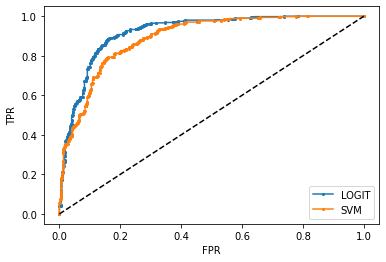

In [64]:
fpr1, tpr1, thresholds1 = roc_curve(y, model1.decision_function(X))
fpr2, tpr2, thresholds1 = roc_curve(y, model2.decision_function(X))

plt.plot(fpr1, tpr1, 'o-', ms=2, label="LOGIT")
plt.plot(fpr2, tpr2, 'o-', ms=2, label="SVM")
plt.legend()
plt.plot([0,1],[0,1],'k--',label="random guess")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [65]:
from sklearn.metrics import auc

# LOGIT과 SVM 그래프 선 안쪽의 공간 넓이를 구하는 auc()
auc(fpr1, tpr1), auc(fpr2, tpr2)

(0.9202541097672734, 0.8914602826207474)

In [ ]:
# 다중클래스의 ROC

In [66]:
df = pd.read_csv("c:/data/iris/iris_n.csv")
df.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name',
       'Species'],
      dtype='object')

In [68]:
cols = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
X = df[cols]
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_score = model.decision_function(X)
y_score[:5]

array([[ 6.69170847,  2.87287358, -9.56458204],
       [ 6.33104421,  2.96062973, -9.29167394],
       [ 6.81974647,  2.82451737, -9.64426384],
       [ 6.30383272,  2.80400913, -9.10784185],
       [ 6.81918472,  2.8011109 , -9.62029562]])

In [70]:
y_hat = model.predict(X_test)
confusion_matrix(y_test, y_hat, labels=[0,1,2])

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]], dtype=int64)

In [74]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_hat,target_names=['0','1','2']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [77]:
# roc_curve() 함수는 이진분류에만 지원되기 때문에 다중 클래스의 경우 각각의 클래스에 대해 별도로 ROC Curve를 그려야함
# 그러기 위한 처리로 label_binarize()로 클래스를 나눠줌
from sklearn.preprocessing import label_binarize
y = label_binarize(y, classes=[0,1,2])
y[:5]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=int32)

ROC_AUC :  {0: 1.0, 1: 0.46040000000000003, 2: 0.9967999999999999}


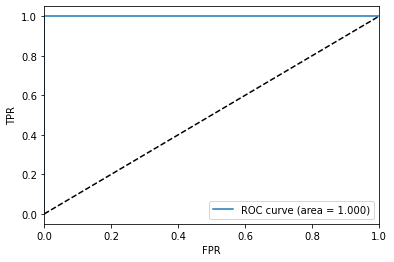

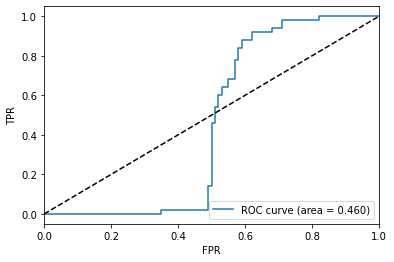

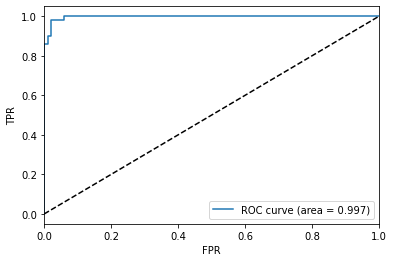

In [78]:
%matplotlib inline
from sklearn.metrics import roc_curve, auc

n_classes = 3
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i],tpr[i],_ = roc_curve(y[:,i], y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

print("ROC_AUC : ", roc_auc)

y_score = model.decision_function(X)
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %.3f)' % roc_auc[i])
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend(loc="lower right")
    plt.show()